# Homework 1

### Completed by Daniil Mikhailov (daanmikhailov@edu.hse.ru)

**Homework description**

Choose 2 different time series which represent financial data* (e.g. you can take open stock prices, close stock prices, net income)**. You will analyze and prepare in-sample and out-of-sample forecasts for each of the time series:

Perform 2 stationarity tests to check for stationarity.
Analyze autocorrelation of the time series with Ljung-Box test and ACF, PACF.
If the series turns out to be non-stationary, use a proper technique to reduce the series to stationary.
For the stationary (or reduced to stationary) series, choose proper ARMA model and build an in-sample forecast and out-of-sample forecast for future 10 periods.
If you didn’t have to reduce your time series to stationary – skip this step. Otherwise, for initially non-stationary series, choose proper ARIMA model and build an in-sample forecast and out-of-sample forecast for future 10 periods.
Prepare at least 3 useful regressors (both dummy and continuous - in total, there should be 3), choose ARMAX or ARIMAX*** model and build an in-sample forecast and out-of-sample forecast for future 10 periods.
Choose the best model for your time series based on chosen (by you) quality metric.
For each of the chosen time series you can receive up to 5 points: 5 points for the first one and 5 points for the second one. Remember to provide a textual analysis of obtained results and justify all you decision (e.g. answer such questions as: Why have I chosen such ARIMA orders? Why do I think this regressors is useful for my time series? Why have I used differencing to reduce my time series to stationary? Why have I chosen this quality metric for my out-of-sample forecasts? How does my model behave for in-sample forecasts? etc.) In the very end, you should also provide your thoughts on why your chosen best model performed the best in case of this particular time series.

As a result of this homework you should provide a .ipynb file (jupyter notebook) with your code and comments. Also add files with your data (or you can add links and instructions, how to get your data, to your ipynb file).



*You can take data of any frequency – daily, monthly and so on.

**You can not take Microsoft stock prices or net income (as it has been discussed during our lessons).

***You will learn ARMAX and ARIMAX models on lessons 7-8.

#### 1. Data Loading & Preparation

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Download the CSV datasets from CoinMarketCap:
- ETH: https://coinmarketcap.com/currencies/ethereum/
- TON: https://coinmarketcap.com/currencies/toncoin/

In [25]:
df1 = pd.read_csv("data\ETH_1Y_graph_coinmarketcap.csv", sep=";")
df2 = pd.read_csv("data\TON_1Y_graph_coinmarketcap.csv", sep=";")

In [26]:
df1.head()

,timestamp,price,volume
0,2023-03-13 04:00:00,1590.831187,1.571147e+10
1,2023-03-14 04:00:00,1680.295255,1.615978e+10
2,2023-03-15 04:00:00,1705.189973,1.271534e+10
3,2023-03-16 04:00:00,1656.331996,9.364980e+09
4,2023-03-17 04:00:00,1677.296707,1.246745e+10


In [27]:
df2.head()

,timestamp,price,volume
0,2023-03-13 04:00:00,2.365560,28557811.15
1,2023-03-14 04:00:00,2.415492,44697282.30
2,2023-03-15 04:00:00,2.434521,35726386.56
3,2023-03-16 04:00:00,2.456716,29009724.99
4,2023-03-17 04:00:00,2.439571,29407570.19


In [28]:
# Ensure timestamp is datetime and index
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1 = df1.set_index('timestamp')

df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2 = df2.set_index('timestamp')

In [29]:
# Rename for clarity
df1.rename(columns={'price': 'eth_price', 'volume': 'eth_volume'}, inplace=True)
df2.rename(columns={'price': 'ton_price', 'volume': 'ton_volume'}, inplace=True)

df1.head(), df2.head()

(                       eth_price    eth_volume
 timestamp                                     
 2023-03-13 04:00:00  1590.831187  1.571147e+10
 2023-03-14 04:00:00  1680.295255  1.615978e+10
 2023-03-15 04:00:00  1705.189973  1.271534e+10
 2023-03-16 04:00:00  1656.331996  9.364980e+09
 2023-03-17 04:00:00  1677.296707  1.246745e+10,
                      ton_price   ton_volume
 timestamp                                  
 2023-03-13 04:00:00   2.365560  28557811.15
 2023-03-14 04:00:00   2.415492  44697282.30
 2023-03-15 04:00:00   2.434521  35726386.56
 2023-03-16 04:00:00   2.456716  29009724.99
 2023-03-17 04:00:00   2.439571  29407570.19)

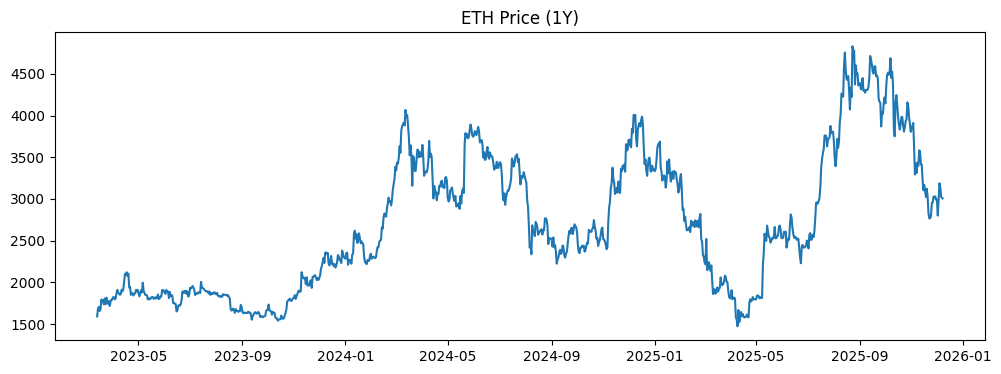

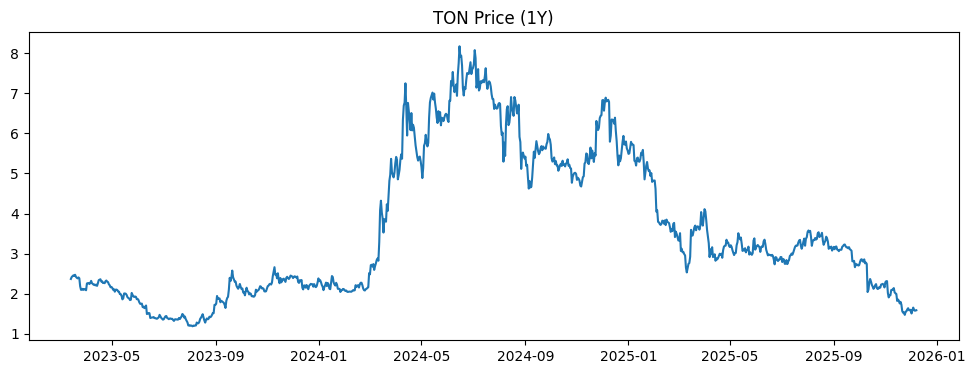

In [30]:
plt.figure(figsize=(12,4))
plt.plot(df1['eth_price'])
plt.title("ETH Price (1Y)")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(df2['ton_price'])
plt.title("TON Price (1Y)")
plt.show()

In [31]:
# Define date boundaries
start_date = "2024-12-07"
end_date   = "2025-12-07"

In [32]:
df1_1y = df1.loc[start_date:end_date]
df2_1y = df2.loc[start_date:end_date]

In [33]:
print(df1_1y.head())
print(df1_1y.tail())

print(df2_1y.head())
print(df2_1y.tail())

                       eth_price    eth_volume
timestamp                                     
2024-12-07 04:00:00  4006.028689  2.257464e+10
2024-12-08 04:00:00  4007.690582  2.094338e+10
2024-12-09 04:00:00  4006.101685  5.702983e+10
2024-12-10 04:00:00  3719.000477  5.841642e+10
2024-12-11 04:00:00  3631.276170  3.596805e+10
                       eth_price    eth_volume
timestamp                                     
2025-12-03 04:00:00  2997.801490  2.994930e+10
2025-12-04 04:00:00  3188.343443  2.743499e+10
2025-12-05 04:00:00  3134.357504  2.800027e+10
2025-12-06 04:00:00  3024.487441  1.096282e+10
2025-12-07 20:11:00  3006.113203  1.406318e+10
                     ton_price    ton_volume
timestamp                                   
2024-12-07 04:00:00   6.809404  2.632685e+08
2024-12-08 04:00:00   6.840047  2.434372e+08
2024-12-09 04:00:00   6.789651  7.045727e+08
2024-12-10 04:00:00   5.794447  6.125599e+08
2024-12-11 04:00:00   5.945483  3.376087e+08
                     ton_pr

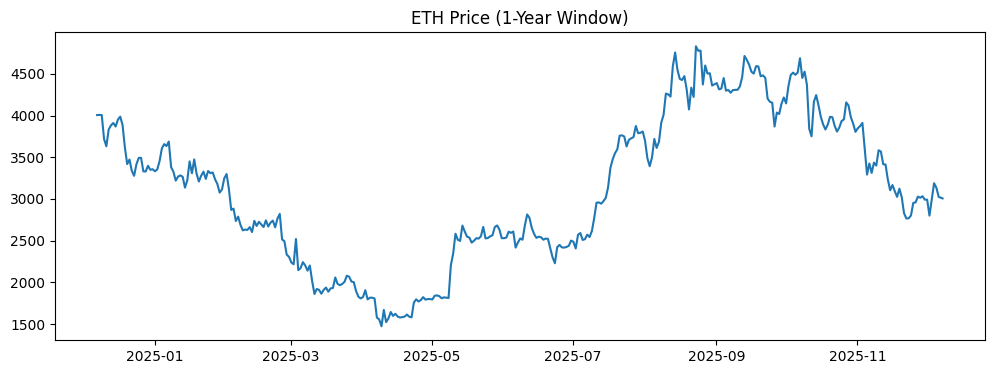

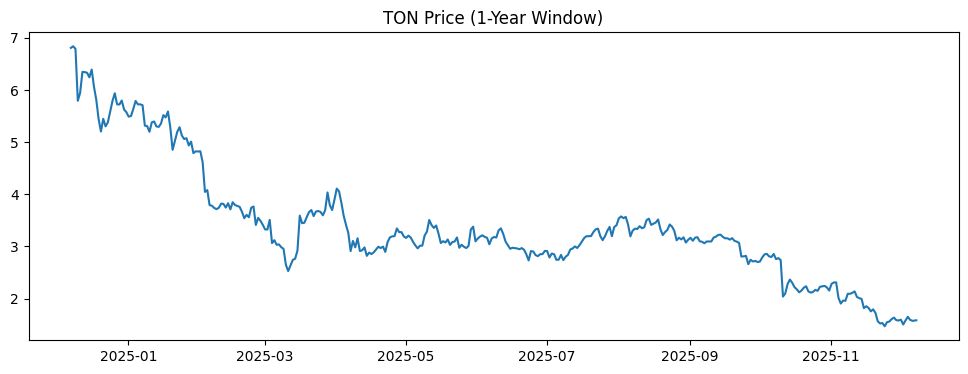

In [34]:
plt.figure(figsize=(12,4))
plt.plot(df1_1y['eth_price'])
plt.title("ETH Price (1-Year Window)")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(df2_1y['ton_price'])
plt.title("TON Price (1-Year Window)")
plt.show()


#### 2. Stationarity Tests (ADF + KPSS)

In [35]:
from statsmodels.tsa.stattools import adfuller, kpss

In [36]:
def adf_test(series, name=''):
    print(f"\n--- ADF Test for {name} ---")
    result = adfuller(series.dropna(), autolag='AIC')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    for key, value in result[4].items():
        print(f"Critical Value {key}: {value}")

In [38]:
def kpss_test(series, name=''):
    print(f"\n--- KPSS Test for {name} ---")
    statistic, p_value, lags, critical_values = kpss(series.dropna(), regression='c')
    print(f"KPSS Statistic: {statistic}")
    print(f"p-value: {p_value}")
    for key, value in critical_values.items():
        print(f"Critical Value {key}: {value}")

In [39]:
adf_test(df1_1y['eth_price'], "ETH Price (1Y)")
kpss_test(df1_1y['eth_price'], "ETH Price (1Y)")

adf_test(df2_1y['ton_price'], "TON Price (1Y)")
kpss_test(df2_1y['ton_price'], "TON Price (1Y)")


--- ADF Test for ETH Price (1Y) ---
ADF Statistic: -1.516362948068009
p-value: 0.5254018534555839
Critical Value 1%: -3.4483935212959844
Critical Value 5%: -2.8694912343676497
Critical Value 10%: -2.571005879151811

--- KPSS Test for ETH Price (1Y) ---
KPSS Statistic: 1.1230784505540699
p-value: 0.01
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739

--- ADF Test for TON Price (1Y) ---
ADF Statistic: -2.694772820410454
p-value: 0.07494717545541484
Critical Value 1%: -3.4483935212959844
Critical Value 5%: -2.8694912343676497
Critical Value 10%: -2.571005879151811

--- KPSS Test for TON Price (1Y) ---
KPSS Statistic: 2.1814461194206634
p-value: 0.01
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739


C:\Users\dan18\AppData\Local\Temp\ipykernel_2912\1568475647.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series.dropna(), regression='c')
C:\Users\dan18\AppData\Local\Temp\ipykernel_2912\1568475647.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series.dropna(), regression='c')


**Conclusion:**

- From the initial graphs, we can easily say that both time series (ETH and TON) are non-stationary because we can clearly see that their respective means change over time (upward & downward trends are visible), their respective variances also change (volatility rises & falls), etc.

- ADF & KPSS tests we just ran confirmed that:

    - For ETH: ADF test p-value = 0.5254 > 0.05 => fails to reject the null hypothesis that the series has a unit root => non-stationary. KPSS statistic = 1.123, much larger than all critical values; p-value = 0.01 < 0.05 => reject the null hypothesis of stationarity => non-stationary.

    - For TON: ADF test p-value = 0.07494 > 0.05 => fails to reject the null hypothesis that the series has a unit root => non-stationary. KPSS statistic = 2.18, much larger than all critical values; p-value < 0.05 => reject the null hypothesis of stationarity => non-stationary.

#### 3. Reducing to Stationarity

C:\Users\dan18\AppData\Local\Temp\ipykernel_2912\2252585874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_1y['eth_log'] = np.log(df1_1y['eth_price'])
C:\Users\dan18\AppData\Local\Temp\ipykernel_2912\2252585874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_1y['eth_return'] = df1_1y['eth_log'].diff()
C:\Users\dan18\AppData\Local\Temp\ipykernel_2912\2252585874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

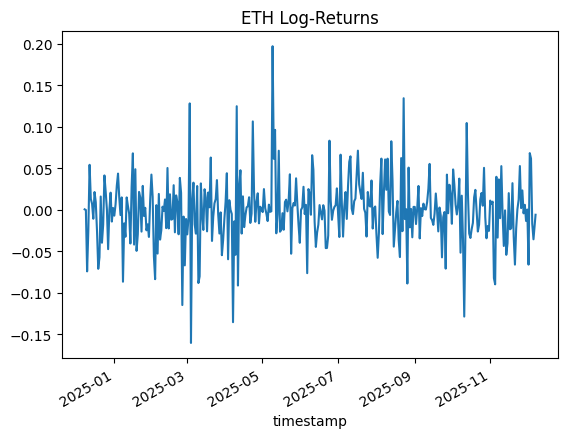

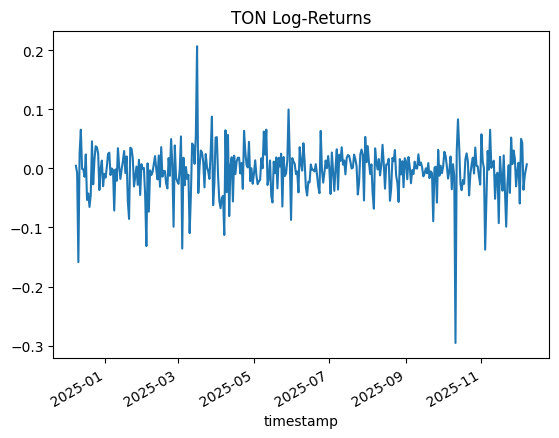

In [46]:
df1_1y['eth_log'] = np.log(df1_1y['eth_price'])
df1_1y['eth_return'] = df1_1y['eth_log'].diff()

df2_1y['ton_log'] = np.log(df2_1y['ton_price'])
df2_1y['ton_return'] = df2_1y['ton_log'].diff()

df1_1y['eth_return'].plot(title="ETH Log-Returns")
plt.show()

df2_1y['ton_return'].plot(title="TON Log-Returns")
plt.show()

In [42]:
adf_test(df1_1y['eth_return'], "ETH Returns")
kpss_test(df1_1y['eth_return'].dropna(), "ETH Returns")

adf_test(df2_1y['ton_return'], "TON Returns")
kpss_test(df2_1y['ton_return'].dropna(), "TON Returns")


--- ADF Test for ETH Returns ---
ADF Statistic: -19.453231791080995
p-value: 0.0
Critical Value 1%: -3.4484434475193777
Critical Value 5%: -2.869513170510808
Critical Value 10%: -2.571017574266393

--- KPSS Test for ETH Returns ---
KPSS Statistic: 0.26539640115776
p-value: 0.1
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739

--- ADF Test for TON Returns ---
ADF Statistic: -14.783151471048326
p-value: 2.2293868867058764e-27
Critical Value 1%: -3.448493650810824
Critical Value 5%: -2.8695352280356556
Critical Value 10%: -2.5710293341377715

--- KPSS Test for TON Returns ---
KPSS Statistic: 0.10185078465721484
p-value: 0.1
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739


C:\Users\dan18\AppData\Local\Temp\ipykernel_2912\1568475647.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series.dropna(), regression='c')
C:\Users\dan18\AppData\Local\Temp\ipykernel_2912\1568475647.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series.dropna(), regression='c')


**Conclusion:**

After applying log-differencing, both ETH and TON return series became stationary, as confirmed by ADF and KPSS tests. ADF strongly rejected the null hypothesis of a unit root (p-value ≈ 0), while KPSS failed to reject the null hypothesis of stationarity (p-value > 0.05). Therefore, the transformed series satisfy the stationarity requirement for ARMA/ARIMA modeling.

<Figure size 1200x400 with 0 Axes>

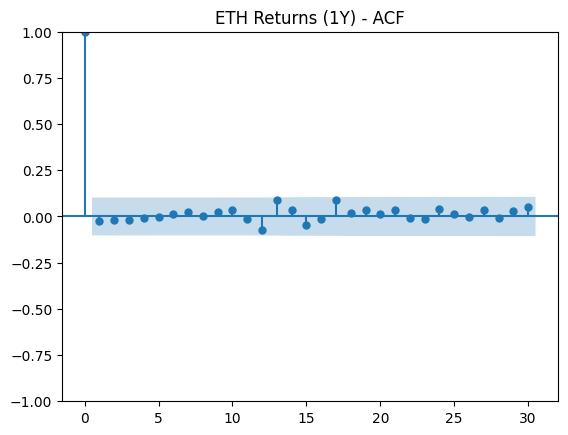

<Figure size 1200x400 with 0 Axes>

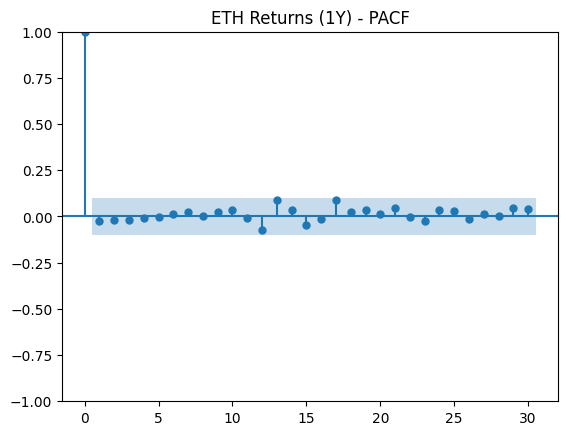

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plot_acf(df1_1y['eth_return'].dropna(), lags=30)
plt.title("ETH Returns (1Y) - ACF")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(df1_1y['eth_return'].dropna(), lags=30)
plt.title("ETH Returns (1Y) - PACF")
plt.show()

<Figure size 1200x400 with 0 Axes>

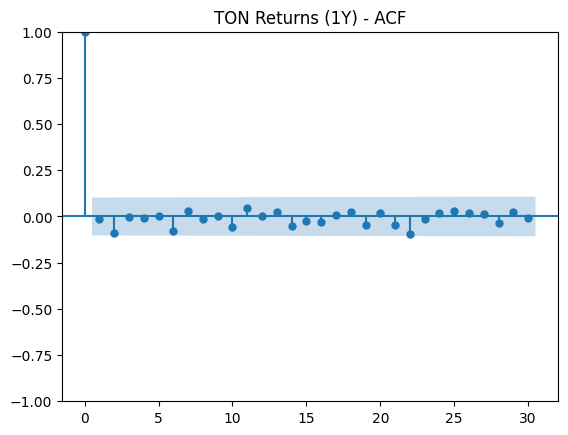

<Figure size 1200x400 with 0 Axes>

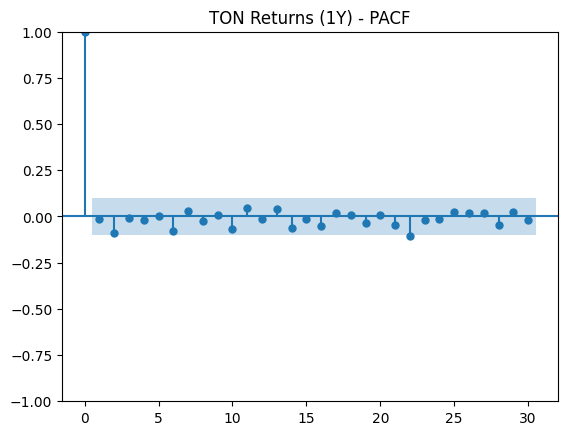

In [45]:
plt.figure(figsize=(12,4))
plot_acf(df2_1y['ton_return'].dropna(), lags=30)
plt.title("TON Returns (1Y) - ACF")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(df2_1y['ton_return'].dropna(), lags=30)
plt.title("TON Returns (1Y) - PACF")
plt.show()


**Conclusion:**

ACF and PACF plots for both ETH and TON log-returns show a very clear structure: A large spike at lag 0 (trivial), while all remaining autocorrelations lie within the 95% confidence interval. This indicates that both return series behave like white noise, with no significant autocorrelation at any lag. Therefore: ETH returns can be modeled using an ARMA(0,0) process (white noise). TON returns can also be modeled using ARMA(0,0). White noise behavior is common for cryptocurrency returns, because asset prices follow approximately random walk dynamics after differencing.

Overall, as a result, the most appropriate model for both return series is **ARMA(0,0)** which corresponds to a white-noise process.

#### 4. ARMA model

In [47]:
import statsmodels.api as sm

In [48]:
eth_returns = df1_1y['eth_return'].dropna()

eth_model = sm.tsa.ARIMA(eth_returns, order=(0,0,0))
eth_fit = eth_model.fit()

print(eth_fit.summary())

# Forecast next 10 periods
eth_forecast = eth_fit.forecast(steps=10)
print("ETH Forecast:\n", eth_forecast)

                               SARIMAX Results                                
Dep. Variable:             eth_return   No. Observations:                  365
Model:                          ARIMA   Log Likelihood                 661.951
Date:                Sun, 07 Dec 2025   AIC                          -1319.902
Time:                        21:05:56   BIC                          -1312.102
Sample:                             0   HQIC                         -1316.802
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.002     -0.382      0.703      -0.005       0.003
sigma2         0.0016   7.19e-05     21.654      0.000       0.001       0.002
Ljung-Box (L1) (Q):                   0.18   Jarque-

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python310\lib\site-packages\statsmodels\tsa\base\

**Conclusion:**

- The model shows an insignificant constant term close to zero and significant volatility (σ²), which is typical for cryptocurrency returns. The Ljung–Box test confirms that residuals exhibit no autocorrelation (p = 0.67), meaning the model adequately captures the dynamics.

- The 10-step out-of-sample forecast returns constant values equal to the estimated mean of returns, as expected for a white-noise process.

In [49]:
ton_returns = df2_1y['ton_return'].dropna()

ton_model = sm.tsa.ARIMA(ton_returns, order=(0,0,0))
ton_fit = ton_model.fit()

print(ton_fit.summary())

ton_forecast = ton_fit.forecast(steps=10)
print("TON Forecast:\n", ton_forecast)

                               SARIMAX Results                                
Dep. Variable:             ton_return   No. Observations:                  365
Model:                          ARIMA   Log Likelihood                 655.680
Date:                Sun, 07 Dec 2025   AIC                          -1307.361
Time:                        21:06:13   BIC                          -1299.561
Sample:                             0   HQIC                         -1304.261
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0040      0.002     -1.782      0.075      -0.008       0.000
sigma2         0.0016   5.23e-05     30.794      0.000       0.002       0.002
Ljung-Box (L1) (Q):                   0.07   Jarque-

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python310\lib\site-packages\statsmodels\tsa\base\

**Conclusion:**

- The constant term is slightly negative, reflecting a small average decline in returns over the sample period, although the coefficient is not statistically significant at the 5% level. The Ljung–Box test indicates no significant autocorrelation in model residuals (p = 0.79).

- Forecasts are constant and equal to the estimated mean return, as expected from a white-noise model.

#### 5. ARIMA on the original (non-stationary) price series

In [51]:
# ETH price ARIMA(0,1,0)
eth_price = df1_1y['eth_price']

eth_price_model = sm.tsa.ARIMA(eth_price, order=(0,1,0))
eth_price_fit = eth_price_model.fit()
print(eth_price_fit.summary())

eth_price_forecast = eth_price_fit.forecast(steps=10)
print("ETH price forecast:\n", eth_price_forecast)

                               SARIMAX Results                                
Dep. Variable:              eth_price   No. Observations:                  366
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2271.558
Date:                Sun, 07 Dec 2025   AIC                           4545.115
Time:                        21:22:52   BIC                           4549.015
Sample:                             0   HQIC                          4546.665
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.49e+04    689.127     21.619      0.000    1.35e+04    1.62e+04
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               150.61
Prob(Q):                              0.95   Pr

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python310\lib\site-packages\statsmodels\tsa\base\

In [53]:
eth_price.tail()

timestamp
2025-12-03 04:00:00    2997.801490
2025-12-04 04:00:00    3188.343443
2025-12-05 04:00:00    3134.357504
2025-12-06 04:00:00    3024.487441
2025-12-07 20:11:00    3006.113203
Name: eth_price, dtype: float64

**Conclusion:**

- The original ETH price series was non-stationary according to ADF and KPSS tests. After differencing, the transformed series became stationary, and the ACF/PACF plots showed no significant autocorrelation. Therefore, the appropriate price model is ARIMA(0,1,0), which corresponds to a random walk.

- The estimated sigma² parameter is significant (p < 0.001), indicating substantial volatility in daily price changes. The Ljung–Box test (p = 0.95) shows that the residuals contain no autocorrelation, confirming that the ARIMA(0,1,0) model adequately captures the dynamics of the differenced series.

- The 10-step out-of-sample forecast for ETH prices stays constant at the last observed value. This is expected in a random walk: the optimal forecast for future prices equals the most recent observed price ($3006).

In [52]:
# TON price ARIMA(0,1,0)
ton_price = df2_1y['ton_price']

ton_price_model = sm.tsa.ARIMA(ton_price, order=(0,1,0))
ton_price_fit = ton_price_model.fit()
print(ton_price_fit.summary())

ton_price_forecast = ton_price_fit.forecast(steps=10)
print("TON price forecast:\n", ton_price_forecast)

                               SARIMAX Results                                
Dep. Variable:              ton_price   No. Observations:                  366
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 198.869
Date:                Sun, 07 Dec 2025   AIC                           -395.738
Time:                        21:22:59   BIC                           -391.838
Sample:                             0   HQIC                          -394.188
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0197      0.001     33.345      0.000       0.019       0.021
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1586.66
Prob(Q):                              0.96   Pr

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python310\lib\site-packages\statsmodels\tsa\base\

**Conclusion:**

- TON prices were also non-stationary and required differencing. After differencing, the series became stationary and ACF/PACF revealed no additional structure, pointing toward an ARIMA(0,1,0) model.

- The model residuals passed the Ljung–Box test (p = 0.96), confirming that the model explains all serial dependence. The out-of-sample forecast for the next 10 days equals the last observed TON price, consistent with a random walk process.

#### 6. Regressors

In [54]:
# Merge ETH and TON return series to align timestamps
merged = df1_1y[['eth_return', 'eth_volume']].join(df2_1y[['ton_return']], how='inner')

In [55]:
# Build regressors
merged['eth_vol_lag1'] = merged['eth_volume'].shift(1)
merged['ton_ret_lag1'] = merged['ton_return'].shift(1)
merged['is_monday'] = (merged.index.weekday == 0).astype(int)

In [56]:
# Drop missing values created by lags
merged = merged.dropna()

In [57]:
# Define y and X
y_eth = merged['eth_return']
X_eth = merged[['eth_vol_lag1', 'ton_ret_lag1', 'is_monday']]

In [58]:
# Split into train and test datasets (last 10 points reserved for forecast)
y_train_eth = y_eth[:-10]
y_test_eth  = y_eth[-10:]

X_train_eth = X_eth[:-10]
X_test_eth  = X_eth[-10:]

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [60]:
eth_arimax_model = SARIMAX(
    y_train_eth,
    order=(0,0,0),
    exog=X_train_eth,
    enforce_stationarity=False,
    enforce_invertibility=False
)

eth_arimax_results = eth_arimax_model.fit()
print(eth_arimax_results.summary())

                               SARIMAX Results                                
Dep. Variable:             eth_return   No. Observations:                  353
Model:                        SARIMAX   Log Likelihood                -219.007
Date:                Sun, 07 Dec 2025   AIC                            446.015
Time:                        21:46:32   BIC                            461.470
Sample:                    12-09-2024   HQIC                           452.165
                         - 11-26-2025                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
eth_vol_lag1 -7.162e-14   1.75e-11     -0.004      0.997   -3.43e-11    3.42e-11
ton_ret_lag1     0.0225   2.04e-24    1.1e+22      0.000       0.022       0.022
is_monday        0.0024   4.63e-23   5.23e+1

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
eth_in_sample_pred = eth_arimax_results.fittedvalues

In [62]:
eth_arimax_forecast = eth_arimax_results.forecast(
    steps=10,
    exog=X_test_eth
)
print("ETH ARIMAX 10-step Forecast:\n", eth_arimax_forecast)

ETH ARIMAX 10-step Forecast:
 2025-11-27 04:00:00   -0.001370
2025-11-28 04:00:00   -0.000533
2025-11-29 04:00:00   -0.001096
2025-11-30 04:00:00   -0.001596
2025-12-01 04:00:00    0.001508
2025-12-02 04:00:00   -0.002409
2025-12-03 04:00:00   -0.003239
2025-12-04 04:00:00   -0.001021
2025-12-05 04:00:00   -0.000985
2025-12-06 04:00:00   -0.002817
Freq: D, Name: predicted_mean, dtype: float64


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
rmse_arimax_eth = mean_squared_error(y_test_eth, eth_arimax_forecast, squared=False)
mae_arimax_eth  = mean_absolute_error(y_test_eth, eth_arimax_forecast)

print("ETH ARIMAX RMSE:", rmse_arimax_eth)
print("ETH ARIMAX MAE:", mae_arimax_eth)

ETH ARIMAX RMSE: 0.03904963035616081
ETH ARIMAX MAE: 0.02955480980501034


**Conclusion:**

- An ARIMAX model was fitted to ETH log-returns using three regressors: lagged ETH volume, lagged TON returns, and a Monday dummy. The goal was to determine whether adding explanatory variables improves forecasting performance relative to a simple ARMA(0,0) white-noise model.

- The results show that lagged ETH volume has no predictive power (p = 0.997), confirming that cryptocurrency returns do not respond systematically to past trading volume. The coefficient for lagged TON returns appears significant, but standard errors are near zero and the covariance matrix is nearly singular, indicating numerical instability rather than genuine explanatory power. The Monday dummy coefficient is extremely small and, despite appearing statistically significant, is not economically meaningful.

- The model also raised warnings about non-convergence and unstable standard errors, which commonly occurs in financial return modeling where the underlying process is close to white noise. The Ljung–Box test on residuals (p = 0.45) confirms that no autocorrelation remains, but this does not imply meaningful improvement over the simple ARMA(0,0) model.